In [8]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf 
import keras
from keras import layers
from tensorflow.keras.preprocessing import image
from pathlib import Path
gpus = tf.config.list_physical_devices("GPU")
tf.config.set_visible_devices(gpus[0],"GPU")
tf.config.experimental.set_memory_growth(gpus[0],True)
print("Using:", tf.config.experimental.get_device_details(gpus[0]).get("device_name"))


Using: NVIDIA GeForce RTX 3060


In [9]:


model = keras.models.load_model("/home/tuanh/projet/DeepDetect/checkpoints/epoch_027_bestmodel.keras")
print("Model loaded")



Model loaded


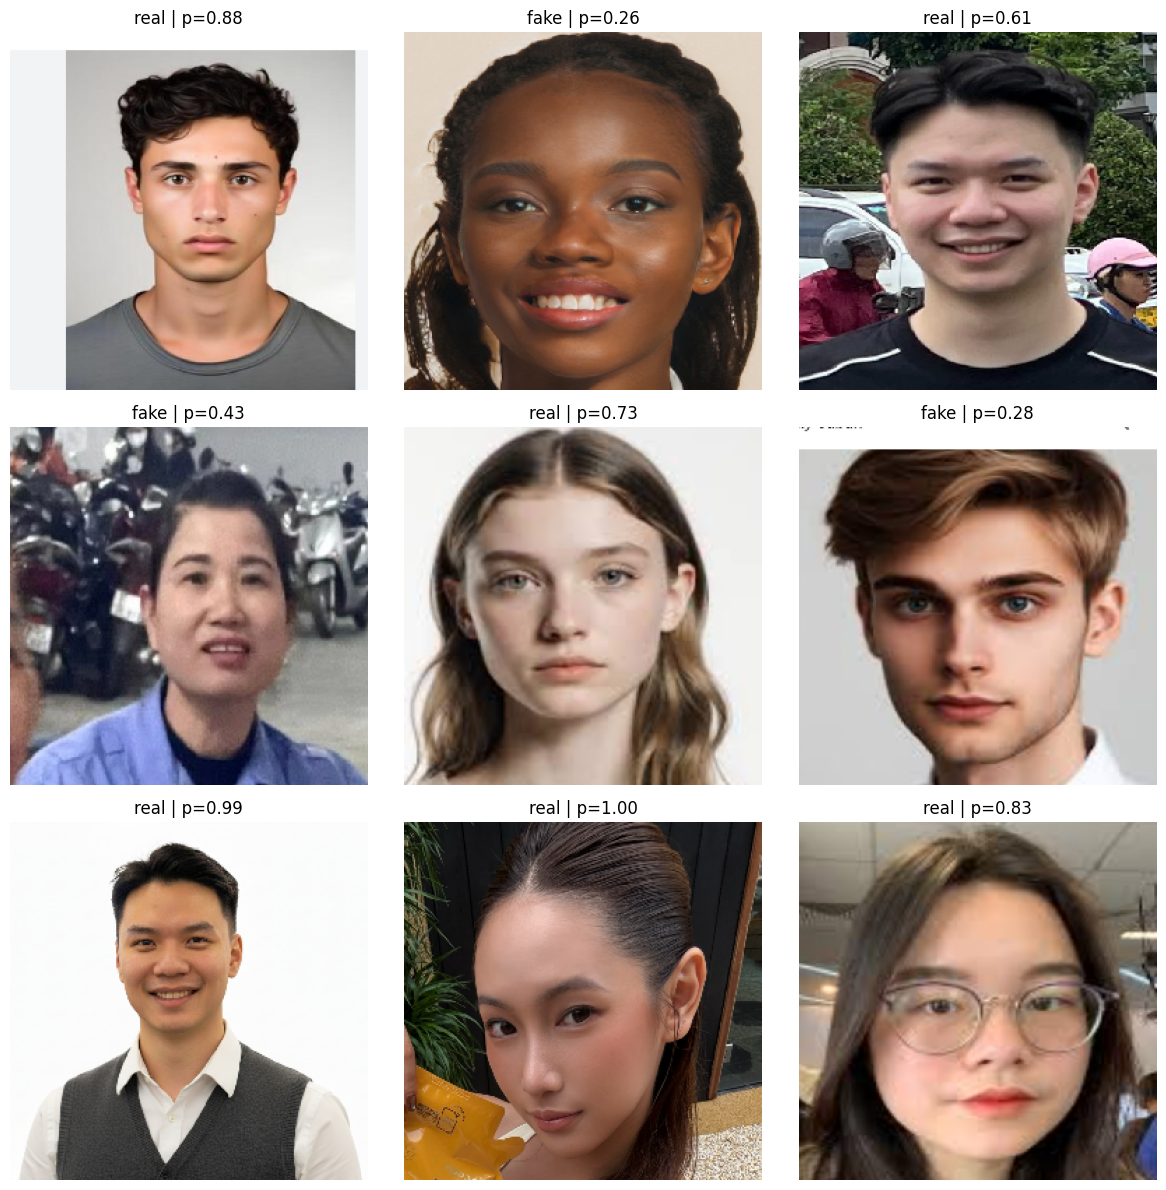

In [17]:

IMG_SIZE = 256  
class_names = ["fake", "real"]   
IMG_DIR = "/home/tuanh/projet/DeepDetect/img_test"

img_paths = list(Path(IMG_DIR).glob("*"))
img_paths = [p for p in img_paths if p.suffix.lower() in [".jpg", ".jpeg", ".png"]]
n = len(img_paths)
img_paths = np.random.choice(img_paths, size=9, replace=False)

# ===== PLOT =====
plt.figure(figsize=(12, 12))

for i, p in enumerate(img_paths):
    img = keras.utils.load_img(p,target_size=(IMG_SIZE, IMG_SIZE))
    x = keras.utils.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    prob = float(model.predict(x, verbose=0)[0][0])
    pred = int(prob >= 0.5)
    label = class_names[pred]

    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(f"{label} | p={prob:.2f}")
    plt.axis("off")

plt.tight_layout()
plt.show()


In [23]:
dataset_path = "/home/tuanh/projet/DeepDetect/dataset/test"
test_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,         
    image_size=(256, 256),
    batch_size=6,
    shuffle=True              
)
test_loss, test_acc = model.evaluate(test_ds)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)



Found 11219 files belonging to 2 classes.
1870/1870 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.8591 - loss: 0.3302
Test loss: 0.3302364647388458
Test accuracy: 0.8590783476829529


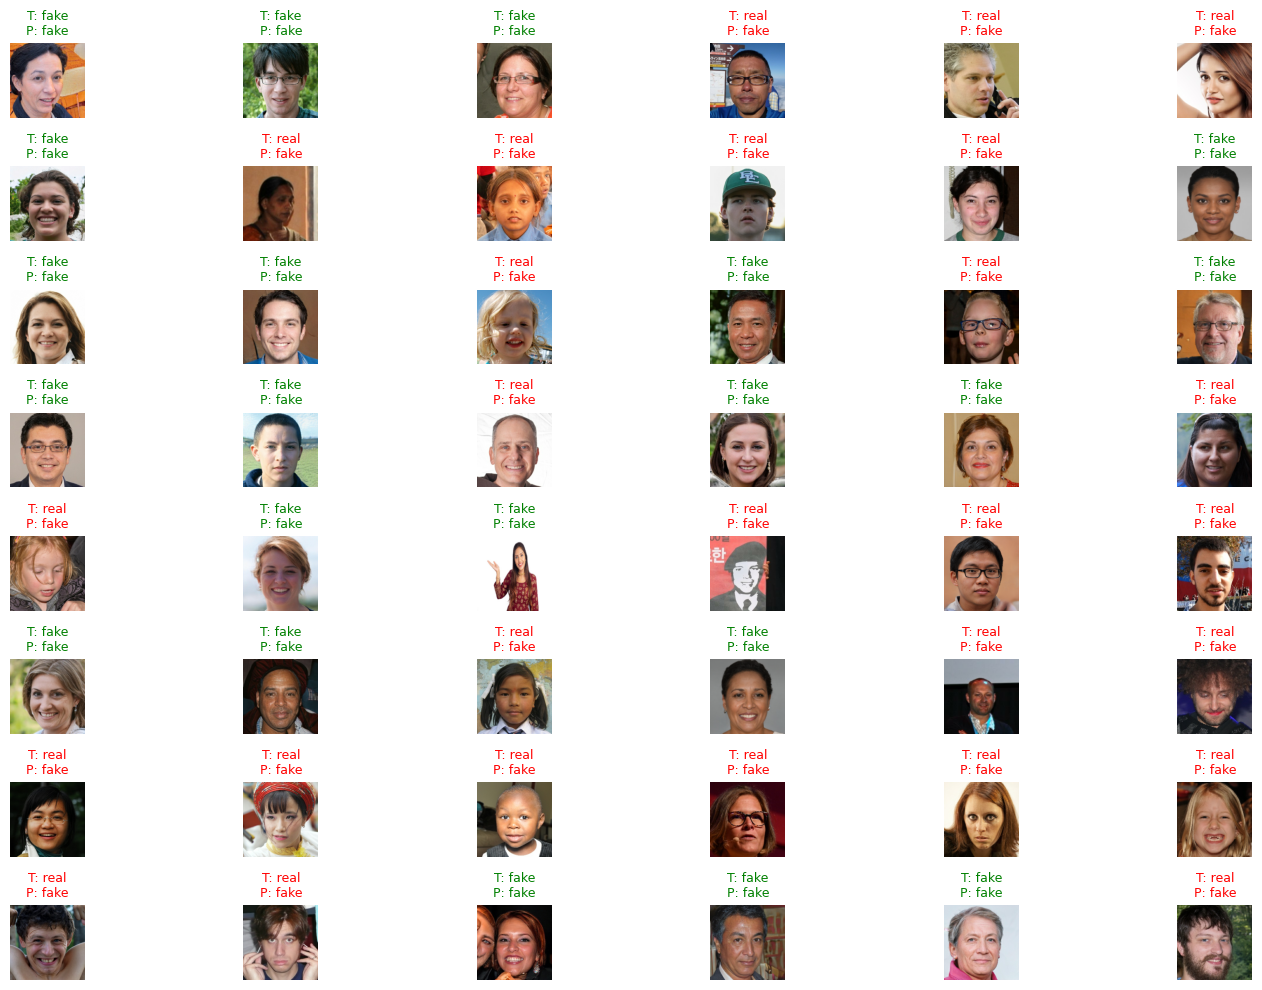

In [26]:


plt.figure(figsize=(15, 10))
idx = 1

test_vis = test_ds.unbatch().shuffle(2000, seed=42).batch(6)

for images, labels in test_vis.take(8):   
    preds = model.predict(images, verbose=0)
    pred_labels = np.argmax(preds, axis=1)
    confidences = np.max(tf.nn.softmax(preds, axis=1), axis=1)

    for i in range(images.shape[0]):
        plt.subplot(8, 6, idx)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        true_label = class_names[labels[i]]
        pred_label = class_names[pred_labels[i]]
        title_color = "green" if true_label == pred_label else "red"
        plt.title(
            f"T: {true_label}\nP: {pred_label}",
            fontsize=9,
            color=title_color
        )
        plt.axis("off")
        idx += 1

plt.tight_layout()
plt.show()
